#Cop1 Analyse

As volunteer in the COP1 association , we are interesting to know what kind of volunteer is registered in the database of marseille to know better were we need to focused for the advertisement.
Over more, I want to automate the Data cleaning

### 1) Data Analysis and Visualization

- Analyze student distribution by course, university, and study level.
- Use histograms and maps to visualize the most popular courses and the distribution of universities.
- Study the age distribution of students.

### 2) Networking Recommendation System

- Develop a system to suggest connections between students with similar academic backgrounds.
- Use K-Means clustering to group students based on their study field and interests.
- Identify where students are most active (e.g., on which social platform Cop1 is most popular).

### 3) Automated Data Cleaning

- Create a Python script to clean and standardize the dataset.
- Detect and correct invalid emails.
- Identify and remove duplicate records.
- Standardize phone numbers to ensure consistency.

### 1) Data analysis and visualization

In [84]:
#stock the work
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import os
os.listdir('/content/drive/MyDrive')

['All_documents (1).pdf',
 'ODR_ByTel_50E_Du_0710_AU_11112019_xp5.pdf',
 'Certificat.pdf',
 'certificatscolar.pdf',
 'RIB Fati.pdf',
 "Atlas d'anatomie générale et radiologique 2e 2019.pdf",
 'ticket.pdf',
 'Mon cv fatima.pdf',
 'MARSEILLE-formulaire BAAS étudiant rvt COVID19.pdf',
 'Tableau_situation_familiale_demandeur.pdf',
 'cerfa acquisition photo signature.pdf',
 '507931215.pdf',
 'Lettre motiv Yasmine.docx',
 'lettre de motivation fatima.pdf',
 'Copie de lettre de motivation fatima.pdf',
 'ticket-PAYFIP0000000011586180.pdf',
 'attestation_AIX0CZFQPT28.pdf',
 'cb.pdf',
 'cb2.pdf',
 'relevé 1.pdf',
 'relevé 2.pdf',
 'relevé 3.pdf',
 'relevé 4.pdf',
 'relevé 6.pdf',
 'photo.jpg',
 'Screenshot.png',
 'lettre de motivation fatima',
 'lettre de motivation fatima13',
 'Déclaration impôts.pdf',
 '1607937756616_1607937750362_Déclaration impôts.pdf',
 'timbre titre de séjour.pdf',
 'fiche_de_suivi_de_reorientation (3).pdf',
 'Cv Fatima.docx',
 'Copie de Mon cv fatima.pdf',
 '

In [126]:
#loadind the xslx file
import sqlite3
import pandas as pd

# Define the path
file_path = "/content/drive/MyDrive/machine learning/Tableau 1 - Bénévoles Cop1 - Solidarités Étudiantes 🤝 2024-2025 (réponses).xlsx"
db_path = "/content/drive/MyDrive/machine learning/database.db"

# load the data of the fist sheet
df = pd.read_excel(file_path, sheet_name="Réponses au formulaire 1")

# look at the culmns name
print("Colonnes présentes dans le fichier Excel :")
print(df.columns)
# Define the path
file_path = "/content/drive/MyDrive/machine learning/Tableau 1 - Bénévoles Cop1 - Solidarités Étudiantes 🤝 2024-2025 (réponses).xlsx"
db_path = "/content/drive/MyDrive/machine learning/database.db"

#
# look at the culmns name
print("Colonnes présentes dans le fichier Excel :")
print(df.columns)

Colonnes présentes dans le fichier Excel :
Index(['Horodateur', 'Prénom', 'Nom ', 'Date de naissance',
       'Cursus suivi et niveau d'études pour l'année 2024-2025',
       'Université / établissement', 'Numéro de Téléphone',
       'Ton adresse mail ?',
       'Ton pseudo Instagram (pour t'ajouter au compte interne des bénévoles Cop1) ',
       'J'accepte d'être contacté.e pour être bénévole',
       'Comment nous as tu connu ?',
       'As-tu déjà eu des expériences associatives ? Si oui, quelles étaient-elles ?',
       'Quelles seront tes disponibilités (par semaine) cette année pour t'investir à Cop1 ?',
       'Pour réaliser un échange de présentation, tu serais plutôt disponible ?',
       'As-tu le permis ? Un véhicule ?',
       'Acceptes-tu d'être pris en photo/vidéo lors de nos événements ?',
       'Tu peux consulter la charte Cop1 en cliquant ici. L'acceptes-tu ?',
       'Et toi, tu as une ou des questions ? Des suggestions ? N'hésite pas 🤗'],
      dtype='object')
Colo

In [87]:
#number of observations
print(f"Number of observations: {len(df)}")

Number of observations: 373


In [127]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Now, rename the columns properly
df.rename(columns={
    "Horodateur": "timestamp",
    "Prénom": "first_name",
    "Nom": "last_name",  # Fixing space issue
    "Date de naissance": "birth_date",
    "Cursus suivi et niveau d'études pour l'année 2024-2025": "course",
    "Université / établissement": "university",
    "Numéro de Téléphone": "phone",
    "Ton adresse mail ?": "email",
    "Ton pseudo Instagram (pour t'ajouter au compte interne des bénévoles Cop1)": "instagram",  # Fixing space issue
    "J'accepte d'être contacté.e pour être bénévole": "volunteer_contact",
    "Comment nous as tu connu ?": "source_info",
    "As-tu déjà eu des expériences associatives ? Si oui, quelles étaient-elles ?": "association_experience",
    "Quelles seront tes disponibilités (par semaine) cette année pour t'investir à Cop1 ?": "availability",
    "Pour réaliser un échange de présentation, tu serais plutôt disponible ?": "presentation_availability",
    "As-tu le permis ? Un véhicule ?": "driving_license_vehicle",
    "Acceptes-tu d'être pris en photo/vidéo lors de nos événements ?": "photo_consent",
    "Tu peux consulter la charte Cop1 en cliquant ici. L'acceptes-tu ?": "charter_agreement",
    "Et toi, tu as une ou des questions ? Des suggestions ? N'hésite pas 🤗": "questions_suggestions"  # Fixing space issue
}, inplace=True)

# Verify the updated column names
print(df.columns)


Index(['timestamp', 'first_name', 'last_name', 'birth_date', 'course',
       'university', 'phone', 'email', 'instagram', 'volunteer_contact',
       'source_info', 'association_experience', 'availability',
       'presentation_availability', 'driving_license_vehicle', 'photo_consent',
       'charter_agreement', 'questions_suggestions'],
      dtype='object')


In [128]:
# List of columns to fill
cols_to_fill = ["association_experience"]

# Check if the column exists before applying fillna
existing_cols = [col for col in cols_to_fill if col in df.columns]

if existing_cols:
    df[existing_cols] = df[existing_cols].fillna("Not provided")
else:
    print(f"Warning: None of {cols_to_fill} exist in the DataFrame.")

# Drop rows where essential information is missing
required_cols = ["email", "course", "university"]
existing_required_cols = [col for col in required_cols if col in df.columns]

if existing_required_cols:
    df.dropna(subset=existing_required_cols, inplace=True)
else:
    print(f"Warning: None of {required_cols} exist in the DataFrame.")

# Check for remaining missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 timestamp                      0
first_name                     0
last_name                      0
birth_date                     0
course                         0
university                     0
phone                          0
email                          0
instagram                     65
volunteer_contact              0
source_info                    0
association_experience         0
availability                   0
presentation_availability      4
driving_license_vehicle        0
photo_consent                  0
charter_agreement              0
questions_suggestions        299
dtype: int64


In [129]:
##handlimng missing values:
# Fill missing values with "Not provided" for optional fields
cols_to_fill = ["association_experience"]  # Remove "source_info"
df[cols_to_fill] = df[cols_to_fill].fillna("Not provided")

# Drop rows where essential information is missing
df.dropna(subset=["email", "course", "university"], inplace=True)

# Check for remaining missing values
print(df.isnull().sum())

timestamp                      0
first_name                     0
last_name                      0
birth_date                     0
course                         0
university                     0
phone                          0
email                          0
instagram                     65
volunteer_contact              0
source_info                    0
association_experience         0
availability                   0
presentation_availability      4
driving_license_vehicle        0
photo_consent                  0
charter_agreement              0
questions_suggestions        299
dtype: int64


- Standardizing Data

To ensure consistency:

Format phone numbers by removing spaces and special characters.
Convert emails to lowercase.
Calculate students’ age from their birth date.

In [93]:
import pandas as pd
from datetime import datetime

# Ensure "phone" column exists before processing
if "phone" in df.columns:
    df["phone"] = df["phone"].astype(str).str.replace(r'\D', '', regex=True)  # Remove non-numeric characters

# Ensure "email" column exists before converting to lowercase
if "email" in df.columns:
    df["email"] = df["email"].str.lower()

# Convert "birth_date" safely
if "birth_date" in df.columns:
    df["birth_date"] = pd.to_datetime(df["birth_date"], errors="coerce")  # Invalid dates become NaT

    # Remove unrealistic birth years (e.g., future dates or too old)
    current_year = datetime.today().year
    df.loc[(df["birth_date"].dt.year < 1900) | (df["birth_date"].dt.year > current_year), "birth_date"] = pd.NaT

    # Function to calculate age
    def calculate_age(birth_date):
        if pd.isnull(birth_date):
            return None  # Return None if birth_date is missing
        today = datetime.today()
        return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))

    df["age"] = df["birth_date"].apply(calculate_age)

# Verify transformations
print(df[["phone", "email", "birth_date", "age"]].head())


          phone                           email birth_date   age
0    0640675168        axelle.renaud@icloud.com 2001-09-02  23.0
1  213666014851              asmaikhe@gmail.com 1998-07-20  26.0
2    0781901534           cielinda134@gmail.com 2002-03-13  23.0
3    0774210924   bouthainahasnaoui17@gmail.com 1995-04-17  29.0
4     753673075  zeinabouhainikoye04@gmail.com  2004-12-18  20.0


Organizing and Exporting to SQLite
To store the cleaned data in an SQLite database.


In [94]:
# Connect to SQLite
conn = sqlite3.connect(db_path)

# Save the cleaned data into the database
df.to_sql("volunteers", conn, if_exists="replace", index=False)

# Close the connection
conn.close()

print("Cleaned data has been saved in SQLite.")


Cleaned data has been saved in SQLite.


a) look at the course popularity

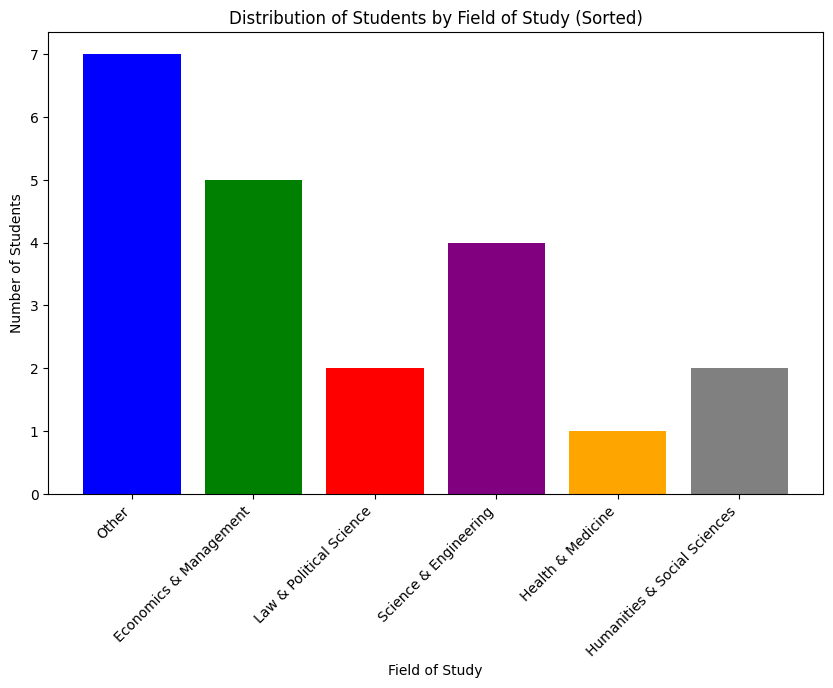

In [95]:
import matplotlib.pyplot as plt
from collections import Counter

# Sample data (replace with actual data extraction)
study_fields = [
    "Licence 2", "M2 TSI", "Master 1 Finance", "L3 PGE", "BTS", "Master 2 Droit",
    "L2 Science pour Ingénieur", "Doctorat en informatique", "L3 Gestion des entreprises",
    "Master 1 communication", "L1 Droit", "Master 2 Économie", "Bac+6 Génie civil",
    "Master 1 Urbanisme", "M1 Informatique", "Master 1 Économétrie", "M2 Santé publique",
    "L3 Histoire", "Master 2 Data Marketing", "Bachelor 2", "L2 Psychologie",
]

# Define broad categories
categories = {
    "Science & Engineering": ["informatique", "ingénieur", "génie", "science", "SPI"],
    "Economics & Management": ["économie", "gestion", "finance", "business", "PGE", "marketing"],
    "Law & Political Science": ["droit", "relations internationales", "politique"],
    "Humanities & Social Sciences": ["psychologie", "lettres", "histoire", "philosophie"],
    "Health & Medicine": ["médecine", "santé", "pharmacocinétique", "biologie"],
    "Other": []
}

# Classify study programs
categorized_counts = Counter()
for field in study_fields:
    found_category = "Other"
    for category, keywords in categories.items():
        if any(keyword.lower() in field.lower() for keyword in keywords):
            found_category = category
            break
    categorized_counts[found_category] += 1

# Plot
plt.figure(figsize=(10, 6))
plt.bar(categorized_counts.keys(), categorized_counts.values(), color=["blue", "green", "red", "purple", "orange", "gray"])
plt.xlabel("Field of Study")
plt.ylabel("Number of Students")
plt.title("Distribution of Students by Field of Study (Sorted)")
plt.xticks(rotation=45, ha="right")
plt.show()


b) University Distribution (Map)

In [96]:
import pandas as pd
import plotly.express as px

# List of universities (after filtering those containing "Aix Marseille")
universities = [
    "Aix Marseille Université", "Aix Marseille", "Aix-Marseille Université", "Aix-Marseille",
    "Aix en Provence Université", "Université Aix-Marseille", "Aix-Marseille Université site Colbert",
    "Faculté des Sciences, Aix-Marseille Université", "Université Aix Marseille, UFR arts, lettres, langues, sciences humaines",
    "Faculté d'Économie et Gestion Aix Marseille", "Aix-Marseille Université, Luminy", "Polytech Marseille",
    "Faculté de médecine La Timone", "Université de Marseille", "Aix-Marseille Université Canebière",
    "Université Aix Marseille site Saint Charles", "Aix Marseille Université", "Aix Marseille",
    "Aix-Marseille Université", "Aix-Marseille", "Aix Marseille Université",
    "Kedge Business School", "Université Paul Valéry", "Institut Agro Rennes", "ISBA TP", "ESI Business School"
]

# Group all universities containing "Aix Marseille" into one category
universities_grouped = [
    "Aix Marseille" if "Aix Marseille" in university else university
    for university in universities
]

# Count occurrences of each university
df = pd.DataFrame(universities_grouped, columns=["university"])
university_counts = df["university"].value_counts().reset_index()
university_counts.columns = ["university", "count"]

# Create a bar map using Plotly
fig = px.bar(university_counts, x="count", y="university", orientation="h",
             title="Distribution of Students by University",
             labels={"count": "Number of Students", "university": "University"},
             color="count", color_continuous_scale="blues")

fig.show()


In [97]:
#number of student
print(f"Number of students: {len(df)}")

Number of students: 26


c) age distribution

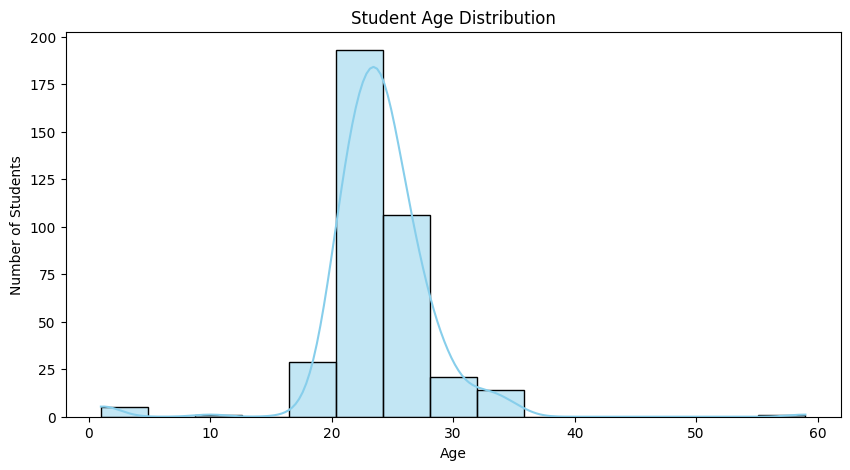

In [73]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install seaborn

# Assuming 'original_df' is the DataFrame with 'birth_date'
# Replace 'original_df' with the actual name if different
original_df = pd.read_excel("/content/drive/MyDrive/machine learning/Tableau 1 - Bénévoles Cop1 - Solidarités Étudiantes 🤝 2024-2025 (réponses).xlsx", sheet_name="Réponses au formulaire 1")
original_df.rename(columns={
    "Horodateur": "timestamp",
    "Prénom": "first_name",
    "Nom": "last_name",  # Fixing space issue
    "Date de naissance": "birth_date",
    "Cursus suivi et niveau d'études pour l'année 2024-2025": "course",
    "Université / établissement": "university",
    "Numéro de Téléphone": "phone",
    "Ton adresse mail ?": "email",
    "Ton pseudo Instagram (pour t'ajouter au compte interne des bénévoles Cop1)": "instagram",  # Fixing space issue
    "J'accepte d'être contacté.e pour être bénévole": "volunteer_contact",
    "Comment nous as tu connu ?": "source_info",
    "As-tu déjà eu des expériences associatives ? Si oui, quelles étaient-elles ?": "association_experience",
    "Quelles seront tes disponibilités (par semaine) cette année pour t'investir à Cop1 ?": "availability",
    "Pour réaliser un échange de présentation, tu serais plutôt disponible ?": "presentation_availability",
    "As-tu le permis ? Un véhicule ?": "driving_license_vehicle",
    "Acceptes-tu d'être pris en photo/vidéo lors de nos événements ?": "photo_consent",
    "Tu peux consulter la charte Cop1 en cliquant ici. L'acceptes-tu ?": "charter_agreement",
    "Et toi, tu as une ou des questions ? Des suggestions ? N'hésite pas 🤗": "questions_suggestions"  # Fixing space issue
}, inplace=True)



# Convert birth_date to datetime
original_df["birth_date"] = pd.to_datetime(original_df["birth_date"], errors="coerce")

# Calculate age
original_df["age"] = original_df["birth_date"].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Plot histogram of age distribution
plt.figure(figsize=(10, 5))
sns.histplot(original_df["age"], bins=15, kde=True, color="skyblue")

plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.title("Student Age Distribution")
plt.show()

In [75]:
#some descriptive statistic
descriptive_stats = original_df["age"].describe() # Use original_df instead of df
print(descriptive_stats)


count    370.000000
mean      24.000000
std        4.525148
min        1.000000
25%       22.000000
50%       24.000000
75%       26.000000
max       59.000000
Name: age, dtype: float64


on average the volunteer have 23 years, and they belong to Aix marseille university. maybe we can look further

## 2) Networking Recommendation System

Index(['timestamp', 'first_name', 'last_name', 'birth_date', 'course',
       'university', 'phone', 'email', 'instagram', 'volunteer_contact',
       'source_info', 'association_experience', 'availability',
       'presentation_availability', 'driving_license_vehicle', 'photo_consent',
       'charter_agreement', 'questions_suggestions', 'age'],
      dtype='object')
                   course                                university  \
0        Master économie                              Aix-Marseille   
1        M2 neurosciences                                      AMU    
2  2 e année de médecine   Université sciences médicales marseille    
3                FARC TEC                            Aix Marseille    
4     Économie gestion L2                 Aix Marseille université    

               association_experience  
0  Cop1 en 2023, UNICEF, Croix Rouge…  
1                               MEDSA  
2                               Nop !  
3                                 Cop  
4 

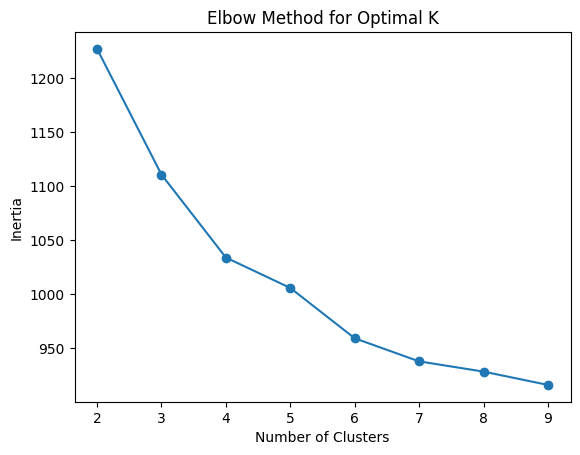

In [133]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Data Preprocessing
# Normalize University names (Group Aix-Marseille variations)
df["university"] = df["university"].replace(
    {"Aix-Marseille Université": "Aix-Marseille", "AMU": "Aix-Marseille"}
)

# Convert birth_date to age
def calculate_age(birth_date):
    if pd.isnull(birth_date):
        return None
    birth_date = pd.to_datetime(birth_date, errors="coerce")
    if pd.isnull(birth_date) or birth_date.year > datetime.today().year:
        return None  # Handle errors like future dates
    today = datetime.today()
    return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))

df["age"] = df["birth_date"].apply(calculate_age)

# Drop NaN ages if necessary
df.dropna(subset=["age"], inplace=True)

# Step 2: Verify the columns
# Print the column names to verify they are correct
print(df.columns)

# Verify that the categorical columns exist and check their content
print(df[["course", "university", "association_experience"]].head())

# Step 3: One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ensure the categorical columns are in string type
df["course"] = df["course"].astype(str)
df["university"] = df["university"].astype(str)
df["association_experience"] = df["association_experience"].astype(str)

# Now apply OneHotEncoder
encoded_fields = encoder.fit_transform(df[["course", "university", "association_experience"]])

# Convert the one-hot encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_fields, columns=encoder.get_feature_names_out(["course", "university", "association_experience"]))

# Step 4: Normalize Numerical Features (age in this case)
scaler = StandardScaler()
df["age_scaled"] = scaler.fit_transform(df[["age"]])

# Combine features for clustering
X = np.hstack([encoded_df, df[["age_scaled"]].values])

# Check if X contains any datetime or non-numeric values
print(f"X contains non-numeric values: {np.any(np.isnan(X))}")  # Ensuring no NaNs or non-numeric types

# Step 5: Find Optimal Number of Clusters (Elbow Method)
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [139]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 4: Apply K-Means Clustering
optimal_k = 2  # Choose based on Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)  # Apply clustering and store cluster IDs

# Step 5: Recommend Connections
def recommend_connections(student_id, df, X, num_recommendations=5):
    # Ensure student_id exists
    if student_id not in df.index:
        return "Student ID not found"

    # Get the cluster of the student
    student_cluster = df.loc[student_id, "cluster"]

    # Find other students in the same cluster
    cluster_students = df[df["cluster"] == student_cluster]

    # Get the student's feature vector
    student_vector = X[student_id].reshape(1, -1)

    # Get feature vectors of students in the same cluster
    cluster_vectors = X[cluster_students.index]

    # Compute cosine similarities
    similarities = cosine_similarity(student_vector, cluster_vectors).flatten()

    # Add the similarity scores to the cluster students
    cluster_students["similarity"] = similarities

    # Sort by similarity (descending) and exclude the student themselves (similarity == 1)
    recommended_students = cluster_students.sort_values(by="similarity", ascending=False)
    recommended_students = recommended_students[recommended_students.index != student_id]

    # Get top 'num_recommendations' students
    recommended_students = recommended_students.head(num_recommendations)

    return recommended_students[["first_name", "last_name", "course", "university", "age", "similarity"]]

# Step 6: Identify Most Active Social Platform
popular_platform = df["instagram"].value_counts().idxmax()
print(f"Most active social platform: {popular_platform}")

# Example: Recommend 5 connections for student with ID 10
student_id = 10
recommended_students = recommend_connections(student_id, df, X, num_recommendations=5)
print(f"Recommended connections for student {student_id}:")
print(recommended_students)


Most active social platform: Iee.soph
Recommended connections for student 10:
Student ID not found


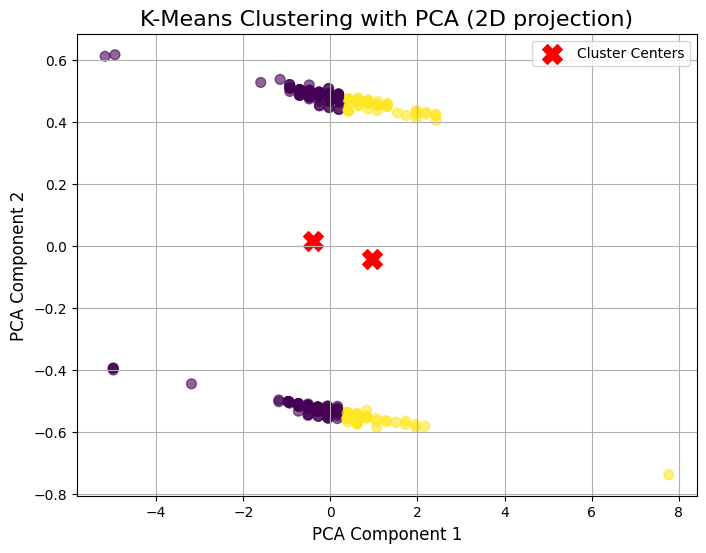

In [140]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 7: Visualize Clusters using PCA
# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)

# Plot cluster centers
centers = pca.transform(kmeans.cluster_centers_)  # Transform cluster centers to 2D space
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# Add labels and title
plt.title("K-Means Clustering with PCA (2D projection)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
